# DES-SDSS-DECAM API

In [1]:
# std lib
from getpass import getpass
import warnings  
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning) # to quiet Astropy warnings

# 3rd party
import numpy as np
import json
import shutil
from numpy.core.defchararray import startswith
import pylab as plt
import matplotlib
%matplotlib inline

from pyvo.dal import sia
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# Data Lab
from dl import queryClient as qc, storeClient as sc, authClient as ac

In [2]:
ac.whoAmI()

'anonymous'

In [8]:
ra_list = open('strong_lens_ra_data.json')
ra_data = json.load(ra_list)
  
dec_list = open('strong_lens_dec_data.json')
dec_data = json.load(dec_list)  

In [9]:
# The subset of Dark Energy Survey DR1 images obtained in the fourth year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y4"
svc_des_y4 = sia.SIAService(DEF_ACCESS_URL)

## Other Possibilities

In [ ]:
#List of Simple Image Access (SIA) service endpoints for different image collections

# The default endpoint points to the entire public Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia"
svc = sia.SIAService(DEF_ACCESS_URL)

# The Astro Data Archive is the default endpoint.  It contains all public data in the archive, including
# raw and processed images, data quality masks, etc.
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

# The subset of images from the Astro Data Archive that overlap with SDSS Stripe 82
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_nsa"
svc_stripe82 = sia.SIAService(DEF_ACCESS_URL)



# Other targeted image subsets that overlap with SDSS Stripe 82
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_calibrated"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_coadd"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_des_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr3"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr4"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr5"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr6"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_ls_dr7"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_raw"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_smash_dr1"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/stripe82_splus_dr1"

# The subset of instrument calibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_all"
svc_cal = sia.SIAService(DEF_ACCESS_URL)
# Other collections of instrument calibrated images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y1" # DES Year 1 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y2" # DES Year 2 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y3" # DES Year 3 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_des_y4" # DES Year 4 calibrated images
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_smash_dr1" # SMASH DR1 calibrated images

# The subset of stacked calibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_all"
svc_coadd = sia.SIAService(DEF_ACCESS_URL)
# Other collections of stacked images for specific surveys
# To use these, call svc = sia.SIAService(DEF_ACCESS_URL)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_decaps_dr1" # DECaPS DR1 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_des_dr1" # DES DR1 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr3" # Legacy Survey DR3 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr4" # Legacy Survey DR4 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr5" # Legacy Survey DR5 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr6" # Legacy Survey DR6 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_ls_dr7" # Legacy Survey DR7 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_smash_dr1" # SMASH DR1 stacks
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_splus_dr1" # S-PLUS DR1 stacks

# The subset of raw uncalibrated images from the Astro Data Archive
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/raw_all"
svc_raw = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey DR1 image release contains images from the first three years of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr1"
svc_des_dr1 = sia.SIAService(DEF_ACCESS_URL)

# The Dark Energy Survey SV image release contains images from the DES SV period
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_sva1"
svc_des_sva1 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the first year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y1"
svc_des_y1 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the second year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y2"
svc_des_y2 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the third year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y3"
svc_des_y3 = sia.SIAService(DEF_ACCESS_URL)

# The subset of Dark Energy Survey DR1 images obtained in the fourth year of DES
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_y4"
svc_des_y4 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Survey DR3
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr3"
svc_ls_dr3 = sia.SIAService(DEF_ACCESS_URL)

# Mosaic-3 and Bok images from Legacy Survey DR4
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr4"
svc_ls_dr4 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Survey DR5
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr5"
svc_ls_dr5 = sia.SIAService(DEF_ACCESS_URL)

# Mosaic-3 and Bok images from Legacy Survey DR6
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr6"
svc_ls_dr6 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from Legacy Survey DR7
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr7"
svc_ls_dr7 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the DECam Plane Survey DR1
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/decaps_dr1"
svc_decaps_dr1 = sia.SIAService(DEF_ACCESS_URL)

# DECam images from the SMASH Survey DR1 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/smash_dr1"
svc_smash_dr1 = sia.SIAService(DEF_ACCESS_URL)

# T80S telescope images from the S-PLUS DR1 release
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_dr1"
svc_splus_dr1 = sia.SIAService(DEF_ACCESS_URL)

## Now API

In [5]:
fov = 0.1 # in degrees

In [10]:
imgTable_list = [svc_des_y4.search((ra_data[i],dec_data[i]), (fov/np.cos(dec_data[i]*np.pi/180), fov), verbosity=2).to_table()[0] for i in range(len(ra_data)) if len(svc_des_y4.search((ra_data[i],dec_data[i]), (fov/np.cos(dec_data[i]*np.pi/180), fov), verbosity=2).to_table())!=0]
len(imgTable_list)

187

In [11]:
url_list = [i['access_url'] for i in imgTable_list]
filename_list = [download_file(i ,cache=True,show_progress=False,timeout=120) for i in url_list]
hdu_list = [fits.open(i)[0] for i in filename_list]
image_list = [i.data for i in hdu_list]
hdr_list = [i.header for i in hdu_list]
wcs_list = [WCS(i) for i in hdr_list]

(700, 1083)
(100, 100)


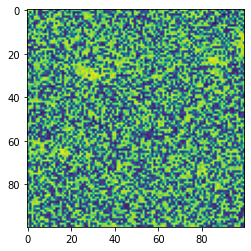

(1372, 1363)
(100, 100)


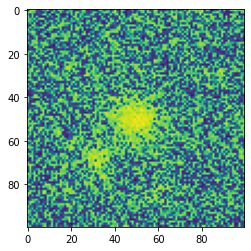

(1372, 1214)
(100, 100)


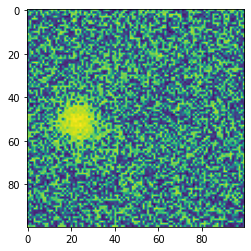

(1370, 690)
(100, 100)


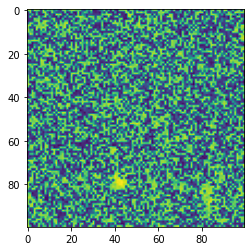

(1002, 740)
(100, 100)


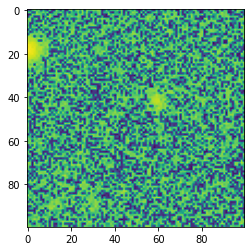

(1381, 1102)
(100, 100)


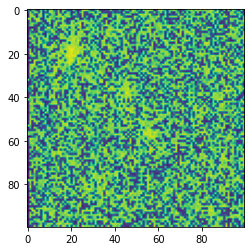

(1208, 709)
(100, 100)


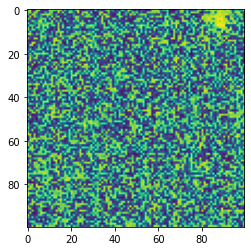

(1367, 1374)
(100, 100)


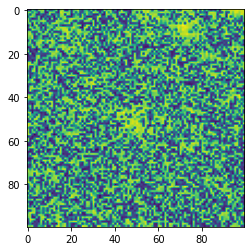

(1368, 1183)
(100, 100)


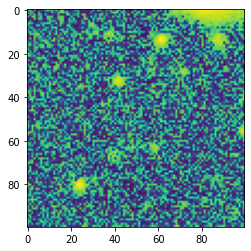

(1366, 1122)
(100, 100)


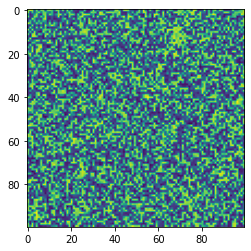

(1240, 1377)
(100, 100)


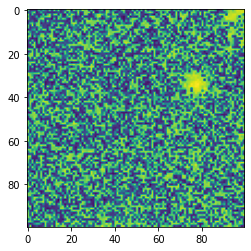

(1374, 1134)
(100, 100)


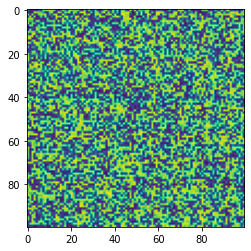

(1018, 1345)
(100, 100)


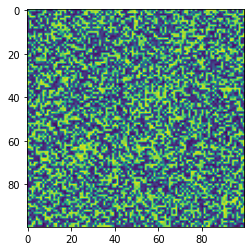

(819, 1006)
(100, 100)


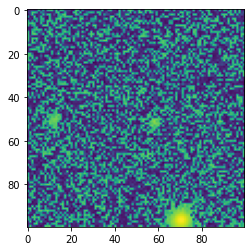

(877, 1211)
(100, 100)


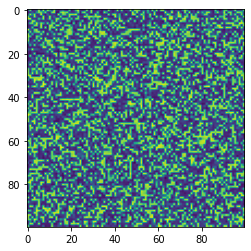

(1356, 998)
(100, 100)


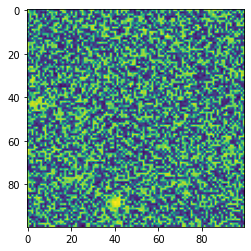

(826, 1038)
(100, 100)


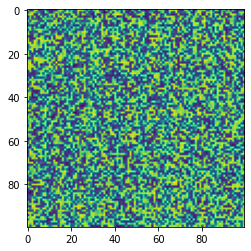

(1364, 1089)
(100, 100)


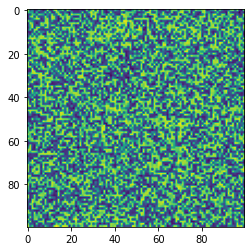

(1376, 971)
(100, 100)


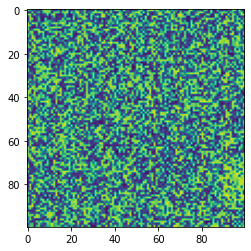

(1160, 1014)
(100, 100)


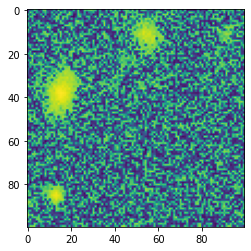

(1213, 827)
(100, 100)


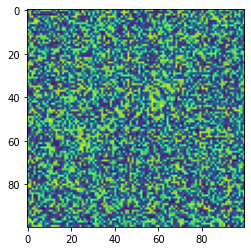

(1374, 1107)
(100, 100)


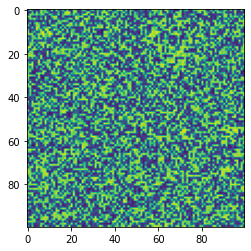

(971, 803)
(100, 100)


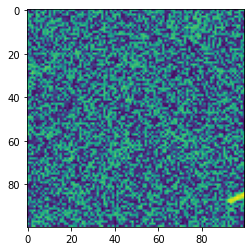

(1378, 1271)
(100, 100)


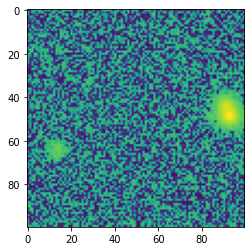

(1366, 801)
(100, 100)


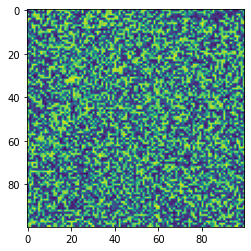

(1366, 1261)
(100, 100)


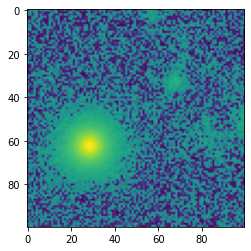

(1371, 695)
(100, 100)


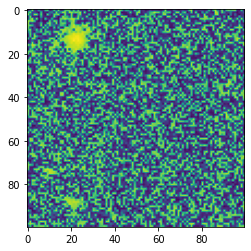

(1374, 1366)
(100, 100)


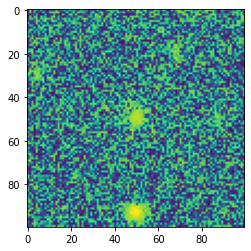

(684, 1096)
(100, 100)


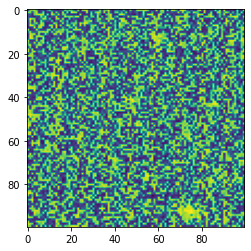

(1366, 1101)
(100, 100)


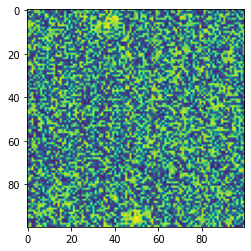

In [12]:
for i in image_list[:30]:
    print(i.shape)
    a = np.arcsinh(i[int(np.round(i.shape[0]/2)-50):int(np.round(i.shape[0]/2)+50), int(np.round(i.shape[1]/2)-50):int(np.round(i.shape[1]/2))+50])
    print(a.shape)
    plt.imshow(a)
    plt.show()